In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

Load in the Diamonds dataset
=================

Load in the diamonds example dataset.  This dataset is a well known, cleaned, example. 

In [4]:
df = pd.read_csv('diamonds.csv')

In [5]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe(include='all')

carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734526      3.538734  
std      3989.439738      1.121761      1.142135      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0059485978>,
      dtype=object)

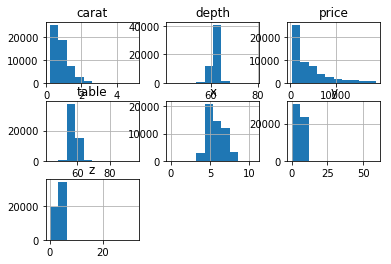

In [8]:
df.hist()

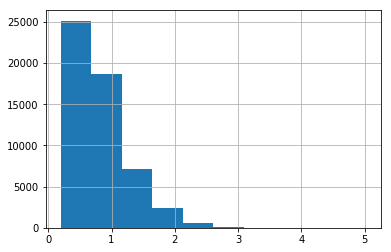

In [9]:
df['carat'].hist()

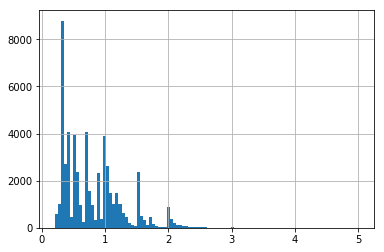

In [10]:
df['carat'].hist(bins=100)

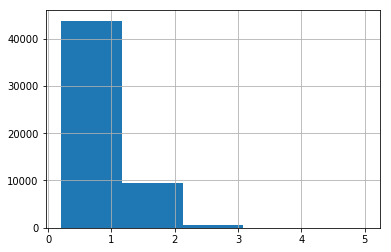

In [11]:
df['carat'].hist(bins=5)

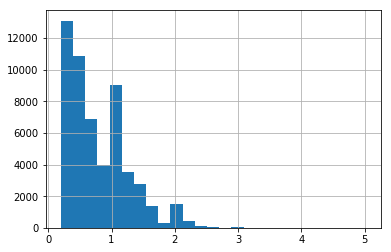

In [12]:
df['carat'].hist(bins=25)

# Plotting using seaborn

Seaborn is a library build on top of matplotlib with a higher-level / easier interface to plots.  Getting a distribution plot in seaborn is straightforward

In [13]:
import seaborn as sb

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


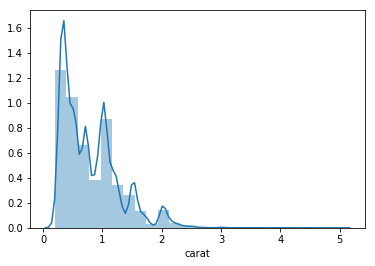

In [14]:
sb.distplot(df['carat'], bins=25)

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


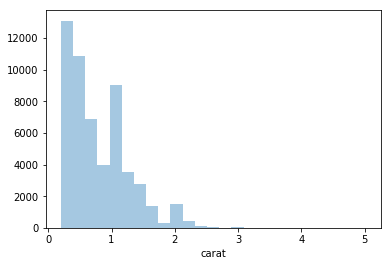

In [15]:
sb.distplot(df['carat'], bins=25, kde=False)

Stacked box plots like we see in the diagrams require a bit more to get what we'd like. 




In [20]:
# the below isn't quite right, unfortunately.  But it's close. 

cut
Fair         AxesSubplot(0.125,0.125;0.775x0.755)
Good         AxesSubplot(0.125,0.125;0.775x0.755)
Ideal        AxesSubplot(0.125,0.125;0.775x0.755)
Premium      AxesSubplot(0.125,0.125;0.775x0.755)
Very Good    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

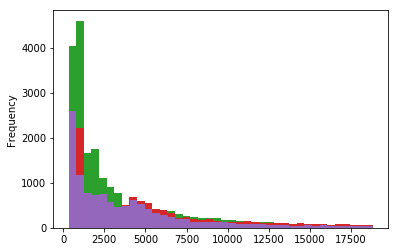

In [21]:
df_gb_cut = df.groupby('cut')
df_gb_cut['price'].plot.hist(stacked=True, bins=int(20000/500))

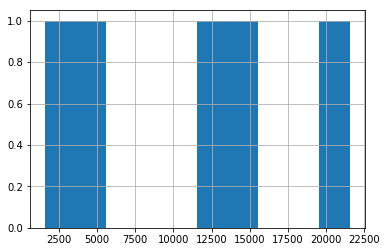

In [22]:
df_gb_cut.count().unstack()['price'].hist()

In [34]:
# scatter plot

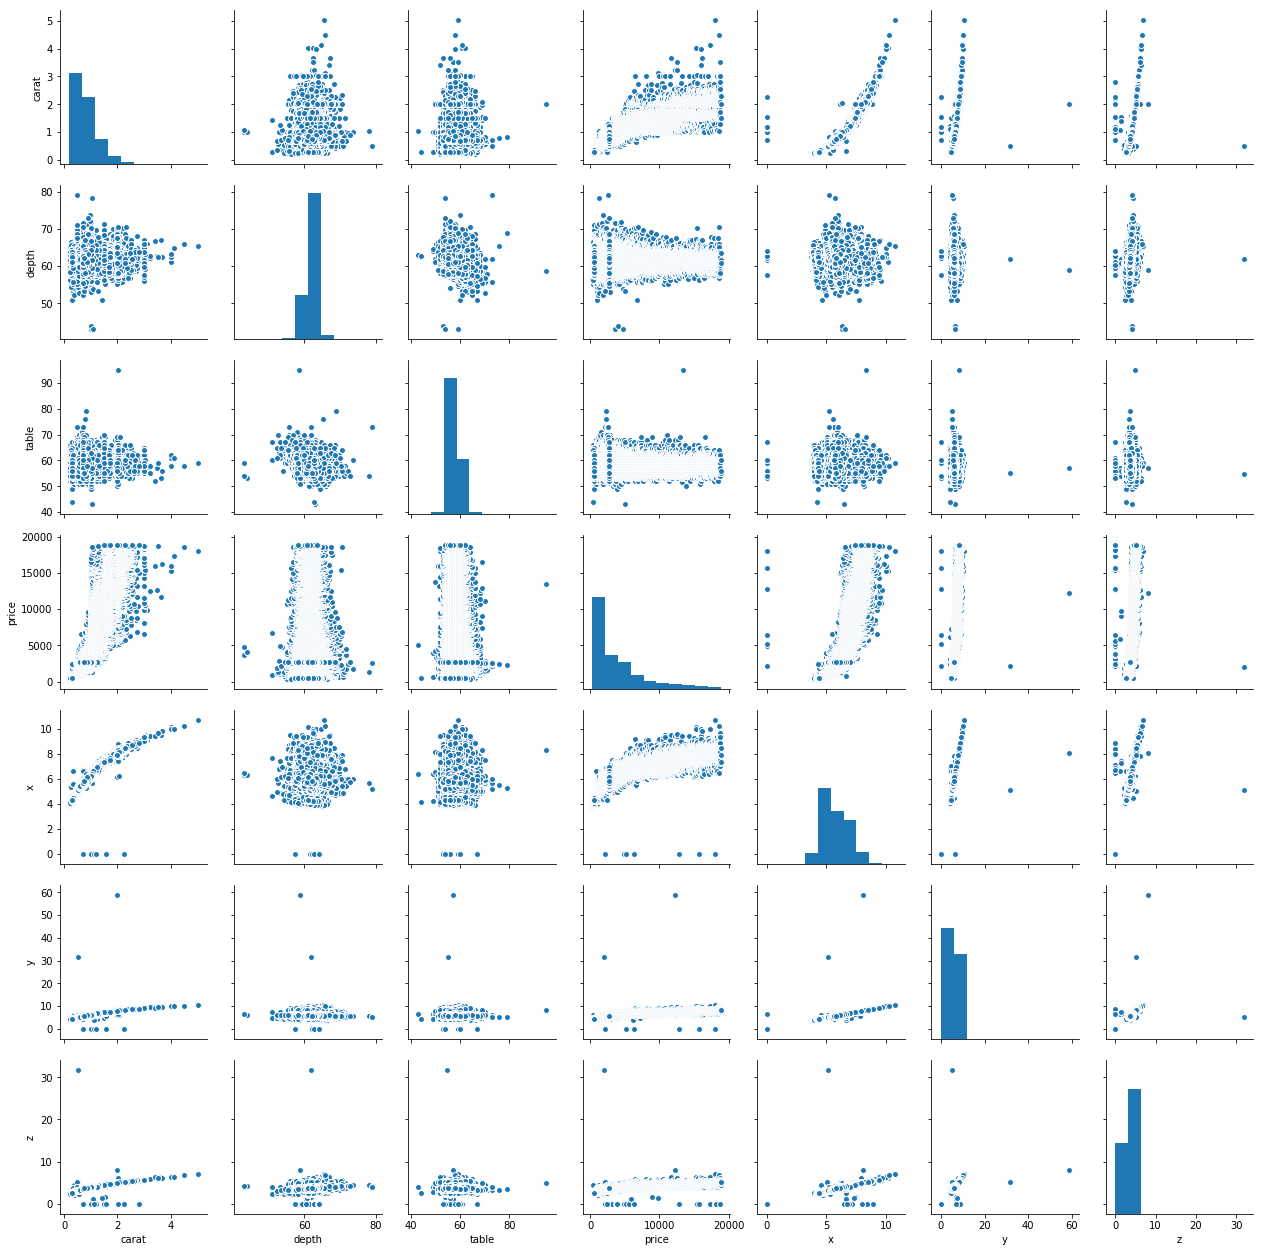

In [25]:
sb.pairplot(df)

In [26]:
# Correlation heatmap

df.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

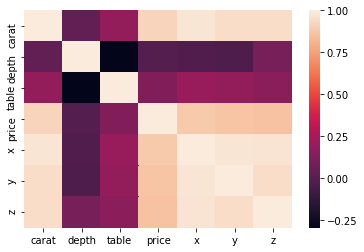

In [27]:
sb.heatmap(df.corr())

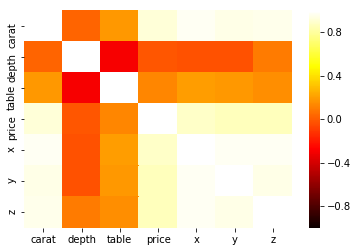

In [33]:
sb.heatmap(df.corr(), vmin=-1, vmax=1, cmap='hot')